In [76]:
import math
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
def bino(n, k):
    def eratosthenes_simple_numbers(N):
        yield 2
        nonsimp = set()
        for i in range(3, N + 1, 2):
            if i not in nonsimp:
                nonsimp |= {j for j in range(i * i, N + 1, 2 * i)}
                yield i
    def calc_pow_in_factorial(a, p):
        res = 0
        while a:
            a //= p
            res += a
        return res
    ans = 1
    for p in eratosthenes_simple_numbers(n):
        ans *= p ** (calc_pow_in_factorial(n, p) - calc_pow_in_factorial(k, p) - calc_pow_in_factorial(n - k, p))
    return ans

In [78]:
memH={0:1}
memP={0:1}
memF={0:0}
memF2={(0,0):0}

def H(n): 
    if n not in memH:
        x=0
        for j in range(n+1):
            xx = (bino(n,j))**2 *(bino(2*j,j))*(bino(2*n-2*j,n-j))
            x+=xx
        memH[n]=x
    return memH[n]

def P(n): 
    if n not in memP:
        y=0
        for j in range(n+1):
            yy = bino(n,j)*((-4)**(n-j)) *H(j)
            y+=yy
        memP[n]=y/12**n
    return memP[n]


def F(n): 
    if n not in memF:
        yy=0
        for j in range(n-1):
            j+=1
            yy+=P(n-j)*F(j)
        memF[n]=P(n)-yy    
    return memF[n]


def Fj(n,j):
    y=[F(i+1) for i in range(n)]
    k=list(y)
    Fnj=[y[-1]]
    jj = 2
    while jj<=j:
        nlist = []
        for nn in range(n): #get Fjj for all n 
            g=0
            for i in range(nn): #get Fjj for nn
                i+=1
                g+= y[i]*k[nn-i]
            nlist.append(g)
        jj+=1
        k=list(nlist)
        Fnj.append(k[-1])
    return Fnj #Fn at j=0 to input J

def Fj2(n,j):
    if j==1:
        return F(n)
    elif (n,j) not in memF2:
        y=0
        for i in range(n):
            i+=1
            y+=F(i)*Fj2(n-i,j-1)
        memF2[(n,j)]=y
    return memF2[(n,j)]

def Hn(Pa,n): #prob of first succesful return after step n
    sm = 0
    for j in range(n):
        j+=1
        sm+=Fj2(n+j,j)*(1-Pa)**(j-1)
    return Pa*sm


In [81]:
for i in range(5):
    print(Hn(0.5,i+1))

0.041666666666666664
0.015625
0.010778356481481483
0.007429711612654322
0.005680162720228909


In [75]:
n=10
kfac=0.01
#Pa=(1/0.256318-1)*kfac 
voxel_radius = 0.005
D = 1
kD = 4 * np.pi * (2 * voxel_radius) * D
ka = kD * kfac
Pa=ka / (6 * np.sqrt(2) * D * voxel_radius)
#print(Pa,1./(1+1./kfac))
ls=[Hn(Pa,i+1) for i in range(n)]
print(Pa,sum(ls))

0.02961921958772244 0.006265667905187531


In [40]:
def Fn(step):
    Flist=[F(i+2) for i in range(step)]
    return Flist,1-sum(Flist)

In [57]:
def Hna(n,P):
    A=3**(3./2)/2/np.pi
    p1=1.344661
    C=A/(1+P*(p1-1))**2
    return P*C*n**(-3./2)/2/np.pi**0.5

def Hna2(n,P):
    A=3**(3./2)/2/np.pi
    p1=1.344661
    C=A/(1-P*(p1-1))**2
    return P*C*n**(-3./2)/2/np.pi**0.5

def err(a,b):
    return (a-b)*100/a

In [58]:
st=100
Pa=0.5
b=Hn(Pa,st)
print('exact',b)
get=Hna(st,Pa)
get2=Hna2(st,Pa)
print(get,'error',err(b,get))
print(get2,'error',err(b,get2))

exact 8.333738675751084e-05
8.487249280194163e-05 error -1.8420376545973587
0.0001702758994191518 error -104.32114089995216


In [18]:
st=300
a,b=Fn(st)
print('exact',b)

for fac in [8,12,16]:
    get=Fna(st,fac)
    print('fac',fac,get,'error',err(b,get))

exact 0.40360099485353773
fac 8 0.42142166659545166 error -4.415418190032176
fac 12 0.4031080647171479 error 0.12213303303891142
fac 16 0.39100935125562136 error 3.119824717599057


In [19]:
st=500
a,b=Fn(st)
print('exact',b)

for fac in [8,12,16]:
    get=Fna(st,fac)
    print('fac',fac,get,'error',err(b,get))

exact 0.3824958188425627
fac 8 0.39859496360355995 error -4.208972743731813
fac 12 0.3820938103420653 error 0.10510141044518029
fac 16 0.3711609211045028 error 2.963404351022568


In [ ]:
st=5000
a,b=Fn(st)
print('exact',b)

for fac in [8,12,16]:
    get=Fna(st,fac)
    print('fac',fac,get,'error',err(b,get))

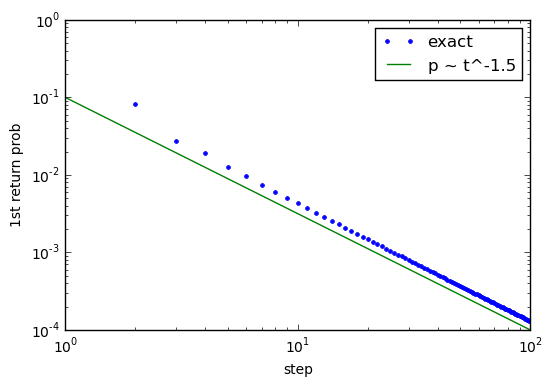

In [9]:
plt.loglog(range(len(prob)),prob,'.',label='exact')
z = lambda x: 0.1*(x**-1.5) #t^(-0.5)
plt.plot(np.logspace(0,2,10),z(np.logspace(0,2,10)),label='p ~ t^-1.5')
plt.xlabel('step')
plt.ylabel('1st return prob')
plt.legend()               